In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
churn = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\Churn_Modelling.csv")

churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [77]:
churn.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#### HANDLING NULL VALUES

In [78]:
churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
# No null values present in the model

#### HANDLING OUTLIERS

In [80]:
# No need to verify outliers for categorical datasets

#### SCALE DOWN THE VALUES

In [81]:
scale = StandardScaler()

churn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scale.fit_transform(churn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [82]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


#### HANDLING CATEGORICAL VALUES

In [83]:
label = LabelEncoder()

churn['Gender'] = label.fit_transform(churn['Gender'])

In [84]:
churn = pd.get_dummies(data=churn, columns=['Geography'], drop_first=True)

churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1


#### FEATURE SELECTION

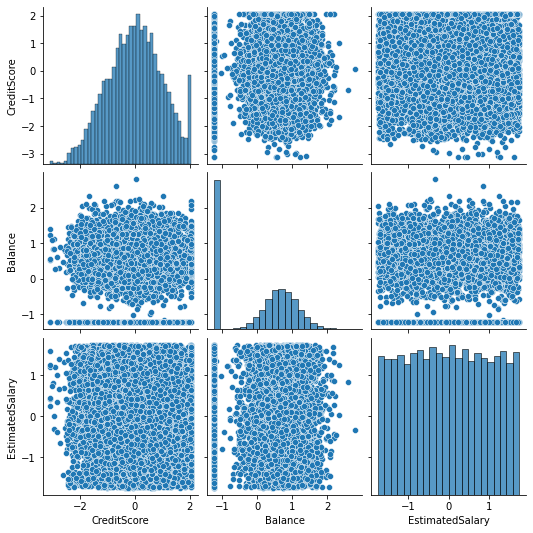

In [85]:
sns.pairplot(churn[['CreditScore', 'Balance', 'EstimatedSalary']])

In [86]:
corr = churn.corr()

corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


<AxesSubplot:>

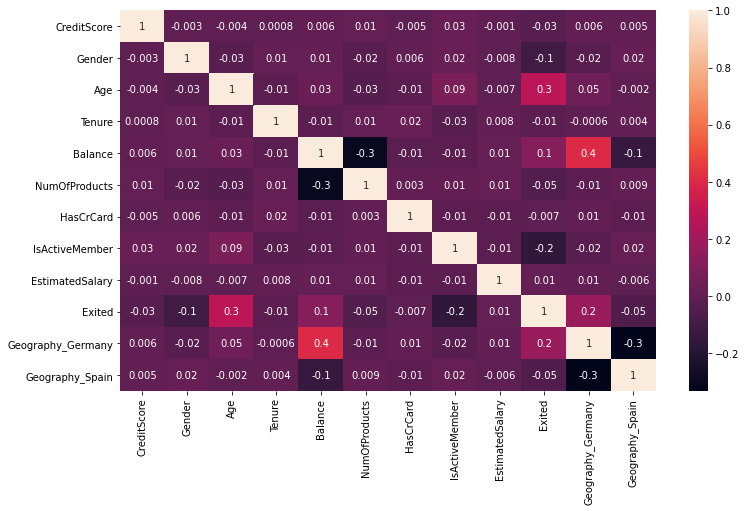

In [87]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, fmt='.1g')

In [88]:
x = churn.drop(["Exited"], axis=1)

y = churn['Exited']

In [89]:
reg = sm.OLS(y, x).fit()

reg.summary()

C:\Users\Meiyappan\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              324.5
Date:                Fri, 11 Dec 2020   Prob (F-statistic):                        0.00
Time:                        12:32:03   Log-Likelihood:                         -4706.1
No. Observations:               10000   AIC:                                      9434.
Df Residuals:                    9989   BIC:                                      9514.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0100      0.004     -2.584      0.010      -0.018      -0.002
Gender                0.0178      0.007      2.510      0.012       0.004       0.032
Age                   0.1130      0.004     28.981      0.000       0.105       0.121
Tenure               -0.0067      0.004     -1.728      0.084      -0.014       0.001
Balance               0.0070      0.004      1.571      0.116      -0.002       0.016
NumOfProducts        -0.0126      0.004     -3.073      0.002      -0.021      -0.005
HasCrCard             0.1407      0.007     20.612      0.000       0.127       0.154
IsActiveMember       -0.0524      0.007     -7.318      0.000      -0.066      -0.038
EstimatedSalary       0.0055      0.004      1.409      0.159      -0.002       0.013
Geography_Germany     0.2265      0.010     23.256      0.000       0.207       0.246
Geography_Spain       0.0891      0.009      9.850      0.000       0.071       0.107
==============================================================================
Omnibus:                     1398.607   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2072.324
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                         3.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
def vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF Score'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

vif(x)

,Features,VIF Score
0,CreditScore,1.000973
1,Gender,1.830434
2,Age,1.011083
3,Tenure,1.001820
4,Balance,1.323617
5,NumOfProducts,1.121431
6,HasCrCard,2.187171
7,IsActiveMember,1.754698
8,EstimatedSalary,1.000748
9,Geography_Germany,1.583741


In [91]:
x = churn.drop(['Balance', 'EstimatedSalary', 'Exited', "Tenure"], axis=1)

y = churn['Exited']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [93]:
y_train.value_counts()

0    6375
1    1625
Name: Exited, dtype: int64

In [94]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=100)

x_train, y_train = smote.fit_sample(x_train, y_train)

In [95]:
logistic = LogisticRegression()

logistic.fit(x_train, y_train)

LogisticRegression()

In [96]:
logistic.score(x_test, y_test)

0.71

In [97]:
cv = cross_val_score(logistic, x_test, y_test, cv=5)

cv

array([0.8125, 0.83  , 0.7875, 0.795 , 0.8025])

In [98]:
cv.mean()

0.8055

In [99]:
print(metrics.classification_report(y_test, logistic.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1588
           1       0.38      0.66      0.48       412

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.79      0.71      0.73      2000



In [100]:
metrics.log_loss(y_test, logistic.predict_proba(x_test) )

0.57650821727042

In [101]:
metrics.roc_auc_score(y_test, logistic.predict(x_test))

0.6924567753295346

In [104]:
FPR, TPR, threshold = metrics.roc_curve(y_test, logistic.predict(x_test))

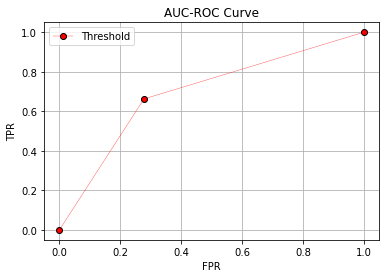

In [110]:
plt.plot(FPR, TPR, marker='o', linewidth=0.3, markeredgecolor='black', c='red', label='Threshold')

plt.title('AUC-ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()